In [23]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('E:/ML_RS/Qgis/Passo_feio/df_pf_gam_mdt_lsat.csv',
                       header=0, 
                        usecols='fid,lon,lat,TC,Kperc,eU,eTh,U_Th,U_K,Th_K,MDT,COD_UNI_ES,SIGLA_UNID,LS9_B6_SWIR,LS9_B5_NIR,LS9_B4_Red,LS9_B3_Green,LS9_B2_Blue,LS9_B7_SWIR2,LS9_RGB_Falsacor_1,LS9_RGB_Falsacor_2,LS9_RGB_Falsacor_3'.split(','),
                       low_memory=False)

In [25]:
column_names = "fid lon lat TC Kperc eU eTh U_Th U_K Th_K MDT COD_UNI_ES SIGLA_UNID LS9_B6_SWIR LS9_B5_NIR LS9_B4_Red LS9_B3_Green LS9_B2_Blue LS9_B7_SWIR2 LS9_RGB_Falsacor_1 LS9_RGB_Falsacor_2 LS9_RGB_Falsacor_3".split(' ')
column_names


['fid',
 'lon',
 'lat',
 'TC',
 'Kperc',
 'eU',
 'eTh',
 'U_Th',
 'U_K',
 'Th_K',
 'MDT',
 'COD_UNI_ES',
 'SIGLA_UNID',
 'LS9_B6_SWIR',
 'LS9_B5_NIR',
 'LS9_B4_Red',
 'LS9_B3_Green',
 'LS9_B2_Blue',
 'LS9_B7_SWIR2',
 'LS9_RGB_Falsacor_1',
 'LS9_RGB_Falsacor_2',
 'LS9_RGB_Falsacor_3']

In [26]:
df.describe()

,fid,lon,lat,TC,Kperc,eU,eTh,U_Th,U_K,Th_K,...,COD_UNI_ES,LS9_B6_SWIR,LS9_B5_NIR,LS9_B4_Red,LS9_B3_Green,LS9_B2_Blue,LS9_B7_SWIR2,LS9_RGB_Falsacor_1,LS9_RGB_Falsacor_2,LS9_RGB_Falsacor_3
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,...,6237.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6253.000000,6455.000000,6455.000000,6455.000000
mean,3240.500000,-53.564996,-30.635005,0.500039,0.494855,0.501498,0.489132,5.329372,7.485620,12.198262,...,2217.307520,10252.115625,17495.964017,8599.580681,8984.144091,8111.893171,10252.115625,63.807591,87.724555,39.584198
std,1870.759204,0.037876,0.079246,0.289611,0.288567,0.286502,0.288364,98.575916,150.306415,589.482663,...,1591.257019,1219.420879,2733.728247,595.341097,599.665233,310.157696,1219.420879,15.944361,19.107456,9.962013
min,1.000000,-53.629990,-30.769983,0.000044,0.000004,0.000505,0.000029,0.000717,0.000718,0.000067,...,135.000000,7397.000000,7687.000000,7315.000000,7477.000000,7334.000000,7397.000000,0.000000,0.000000,0.000000
25%,1620.750000,-53.597493,-30.702494,0.248856,0.244507,0.255996,0.237625,0.510615,0.517667,0.493398,...,152.000000,9328.000000,15758.000000,8148.000000,8513.000000,7885.000000,9328.000000,58.500000,84.000000,36.000000
50%,3240.500000,-53.564996,-30.635005,0.499756,0.492584,0.506608,0.476460,1.027505,1.010362,0.995360,...,2711.000000,10181.000000,17556.000000,8525.000000,8949.000000,8096.000000,10181.000000,66.000000,91.000000,41.000000
75%,4860.250000,-53.532499,-30.567516,0.750780,0.744987,0.746949,0.738907,2.101909,2.038083,1.985643,...,3661.000000,11062.000000,19270.000000,8970.000000,9421.000000,8308.000000,11062.000000,74.000000,98.000000,45.000000
max,6480.000000,-53.500002,-30.500027,0.999761,0.999953,0.999603,0.999844,7550.956899,9793.230459,47292.650373,...,7252.000000,15615.000000,27315.000000,12372.000000,11667.000000,10137.000000,15615.000000,98.000000,125.000000,65.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fid                 6480 non-null   int64  
 1   lon                 6480 non-null   float64
 2   lat                 6480 non-null   float64
 3   TC                  6480 non-null   float64
 4   Kperc               6480 non-null   float64
 5   eU                  6480 non-null   float64
 6   eTh                 6480 non-null   float64
 7   U_Th                6480 non-null   float64
 8   U_K                 6480 non-null   float64
 9   Th_K                6480 non-null   float64
 10  MDT                 6195 non-null   float64
 11  COD_UNI_ES          6237 non-null   float64
 12  SIGLA_UNID          6237 non-null   object 
 13  LS9_B6_SWIR         6253 non-null   float64
 14  LS9_B5_NIR          6253 non-null   float64
 15  LS9_B4_Red          6253 non-null   float64
 16  LS9_B3

In [28]:
df.interpolate(method='linear', inplace=True)

C:\Users\Matias\AppData\Local\Temp\ipykernel_8804\2868764835.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fid                 6480 non-null   int64  
 1   lon                 6480 non-null   float64
 2   lat                 6480 non-null   float64
 3   TC                  6480 non-null   float64
 4   Kperc               6480 non-null   float64
 5   eU                  6480 non-null   float64
 6   eTh                 6480 non-null   float64
 7   U_Th                6480 non-null   float64
 8   U_K                 6480 non-null   float64
 9   Th_K                6480 non-null   float64
 10  MDT                 6480 non-null   float64
 11  COD_UNI_ES          6480 non-null   float64
 12  SIGLA_UNID          6237 non-null   object 
 13  LS9_B6_SWIR         6480 non-null   float64
 14  LS9_B5_NIR          6480 non-null   float64
 15  LS9_B4_Red          6480 non-null   float64
 16  LS9_B3

### Limpando os dados

In [30]:
df = df.dropna(subset=['SIGLA_UNID'])

df['SIGLA_UNID'].nunique()

12

In [31]:
contagem_dos_locais = df['SIGLA_UNID'].value_counts()
print(contagem_dos_locais)

SIGLA_UNID
NP12vpf             1277
NP3sl                851
NP3sf                663
NP3an                658
NP3_gamma_ca         646
MP1_beta_am          639
NP3ps                508
NP3_beta_he          431
NP3C_cortado_1vz     323
NP3_alfa_avp         132
NP12vpfc              87
NP12vpfm              22
Name: count, dtype: int64


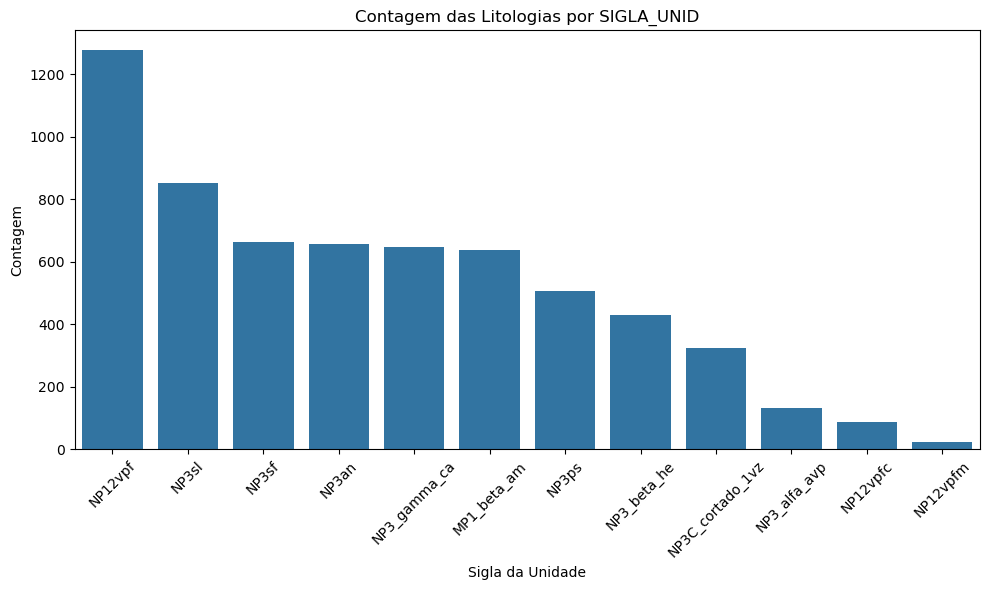

In [32]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme necessário
sns.barplot(x=contagem_dos_locais.index, y=contagem_dos_locais.values)

# Adicionar títulos e formatação
plt.title('Contagem das Litologias por SIGLA_UNID')
plt.xlabel('Sigla da Unidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor legibilidade

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()


In [33]:
#Subistituição da classe NP12vpfm por NP12vpf, por conta do tamanho de amostras não ser representativo.
df['SIGLA_UNID'] = df['SIGLA_UNID'].replace({'NP12vpfm': 'NP12vpf'})

In [34]:
print(df['SIGLA_UNID'].value_counts())

SIGLA_UNID
NP12vpf             1299
NP3sl                851
NP3sf                663
NP3an                658
NP3_gamma_ca         646
MP1_beta_am          639
NP3ps                508
NP3_beta_he          431
NP3C_cortado_1vz     323
NP3_alfa_avp         132
NP12vpfc              87
Name: count, dtype: int64


SIGLA_UNID
NP12vpf             1299
NP3sl                851
NP3sf                663
NP3an                658
NP3_gamma_ca         646
MP1_beta_am          639
NP3ps                508
NP3_beta_he          431
NP3C_cortado_1vz     323
NP3_alfa_avp         132
NP12vpfc              87
Name: count, dtype: int64


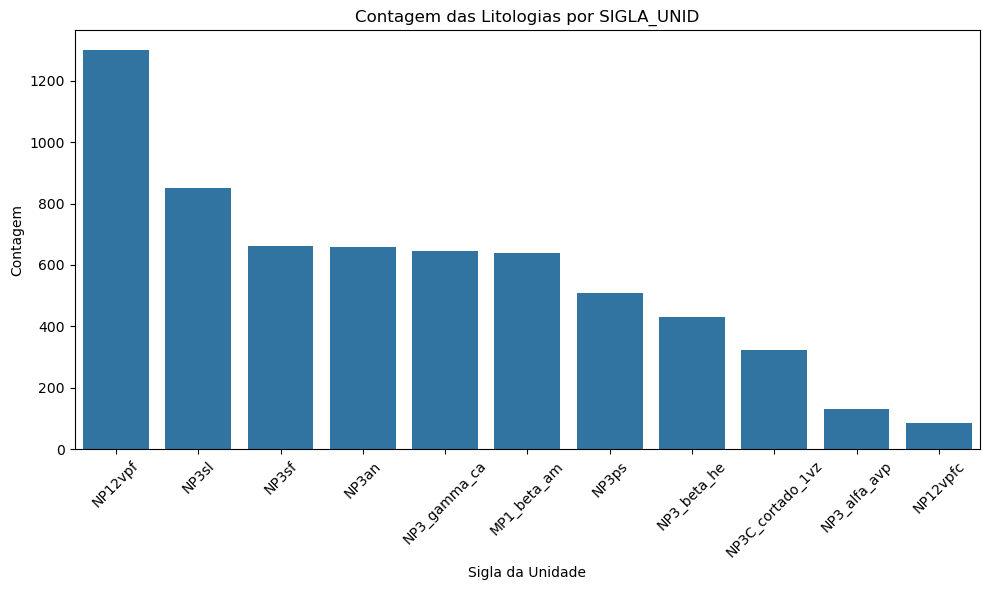

In [35]:
contagem_dos_locais = df['SIGLA_UNID'].value_counts()
print(contagem_dos_locais)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajuste o tamanho conforme necessário
sns.barplot(x=contagem_dos_locais.index, y=contagem_dos_locais.values)

# Adicionar títulos e formatação
plt.title('Contagem das Litologias por SIGLA_UNID')
plt.xlabel('Sigla da Unidade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor legibilidade

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()


In [36]:
area_status = df.groupby('SIGLA_UNID')[['TC', 'Kperc', 'eU', 'eTh', 'MDT']].describe()
print(area_status)

                      TC                                                    \
                   count      mean       std       min       25%       50%   
SIGLA_UNID                                                                   
MP1_beta_am        639.0  0.501287  0.285977  0.000549  0.258482  0.500463   
NP12vpf           1299.0  0.497729  0.295851  0.000447  0.229216  0.503223   
NP12vpfc            87.0  0.494631  0.302611  0.015831  0.211297  0.511430   
NP3C_cortado_1vz   323.0  0.487520  0.284093  0.004327  0.252284  0.460667   
NP3_alfa_avp       132.0  0.523412  0.295286  0.007194  0.265876  0.524392   
NP3_beta_he        431.0  0.524860  0.293014  0.001415  0.287212  0.536575   
NP3_gamma_ca       646.0  0.505011  0.297782  0.000746  0.241469  0.494080   
NP3an              658.0  0.499369  0.278096  0.002206  0.250986  0.516477   
NP3ps              508.0  0.502745  0.302290  0.000044  0.225217  0.493650   
NP3sf              663.0  0.517173  0.279556  0.000705  0.277482

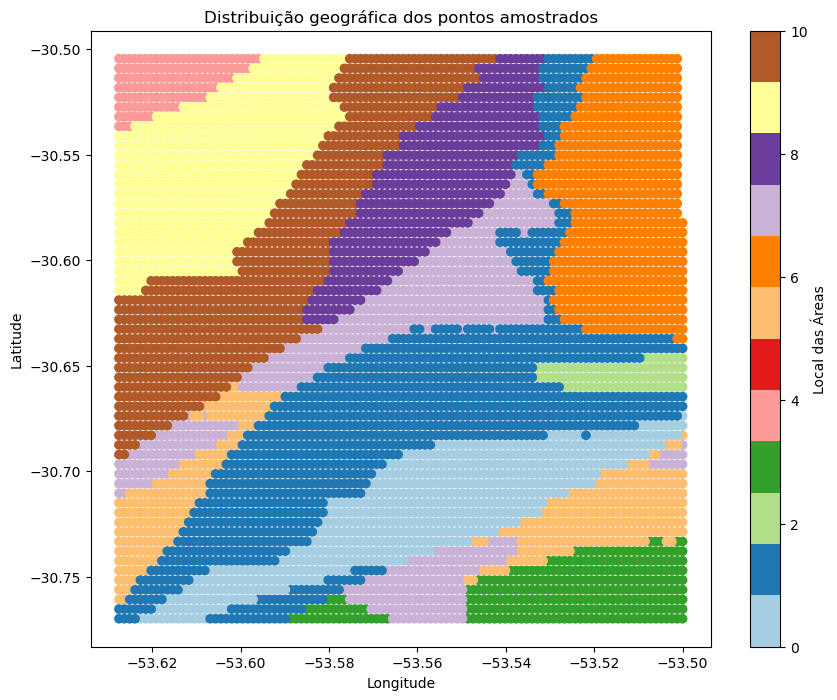

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(df['lon'], df['lat'], c=df['SIGLA_UNID'].astype('category').cat.codes, cmap='Paired') 
plt.colorbar(label='Local das Áreas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição geográfica dos pontos amostrados')
plt.show()

In [38]:
# Verifique se há valores radiométricos extremos
print(df[df['U_Th'] > 20][['fid','U_Th']])

# Verifique a faixa de elevação
print(f"MDT range: {df['MDT'].min()} to {df['MDT'].max()}")

# Verifique coordenadas duplicadas
coord_dupes = df[df.duplicated(subset=['lon','lat'])]
print(f"{len(coord_dupes)} duplicate coordinate pairs")

       fid        U_Th
6        7   67.670866
194    195   20.531909
205    206  147.888172
230    231   32.162355
241    242   21.119290
...    ...         ...
6040  6041   30.196590
6078  6079   72.112078
6094  6095   52.015172
6124  6125  149.030925
6151  6152   45.550276

[161 rows x 2 columns]
MDT range: 109.0 to 446.0
0 duplicate coordinate pairs


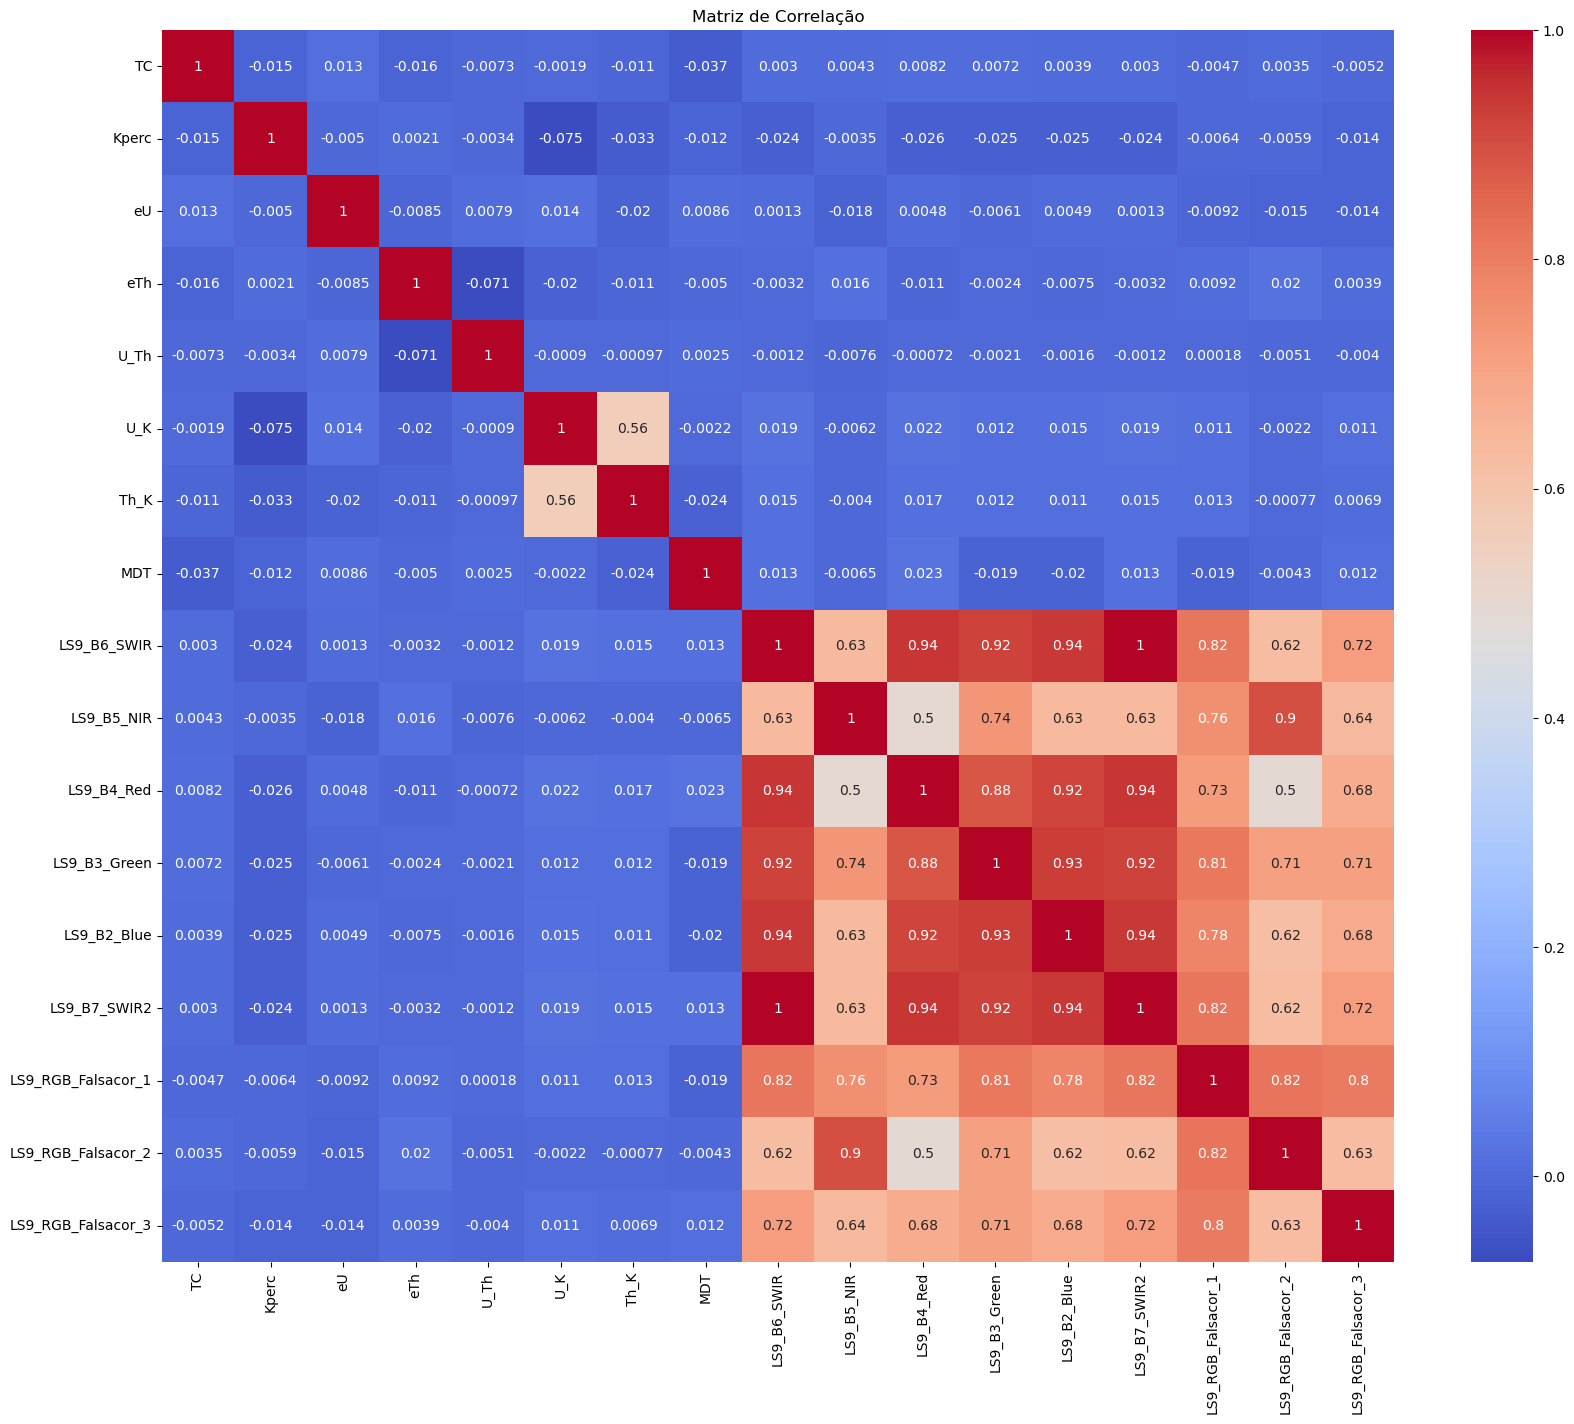

In [39]:
# Calcula a matriz de correlação
corr_matrix = df.drop(['fid', 'lon', 'lat', 'SIGLA_UNID', 'COD_UNI_ES'], axis=1).corr()

# Plota a matriz de correlação como um heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()

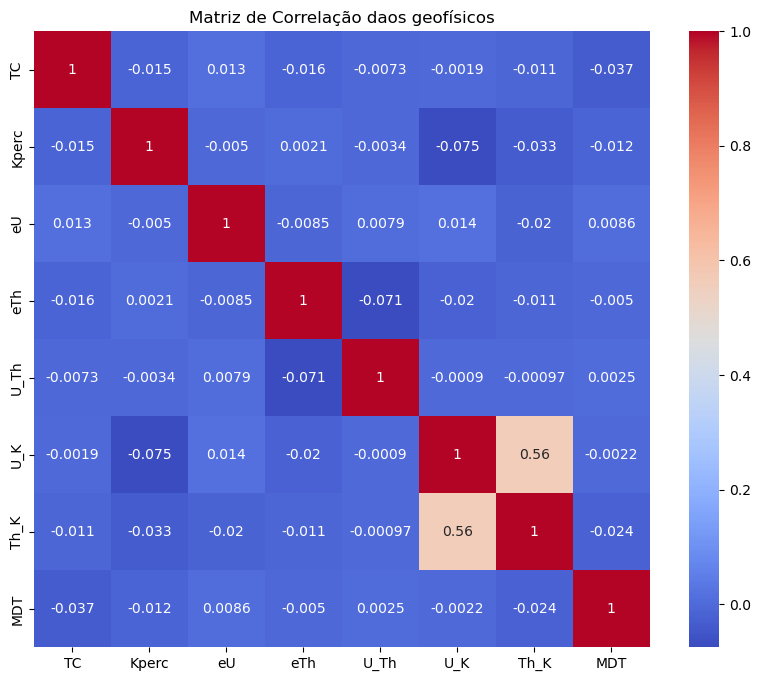

In [40]:
# Calcula a matriz de correlação
corr_matrix = df.drop(['fid', 'lon', 'lat', 'SIGLA_UNID', 'COD_UNI_ES', 'LS9_B6_SWIR',
 'LS9_B5_NIR',
 'LS9_B4_Red',
 'LS9_B3_Green',
 'LS9_B2_Blue',
 'LS9_B7_SWIR2',
 'LS9_RGB_Falsacor_1',
 'LS9_RGB_Falsacor_2',
 'LS9_RGB_Falsacor_3'], axis=1).corr()

# Plota a matriz de correlação como um heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlação daos geofísicos')
plt.show()

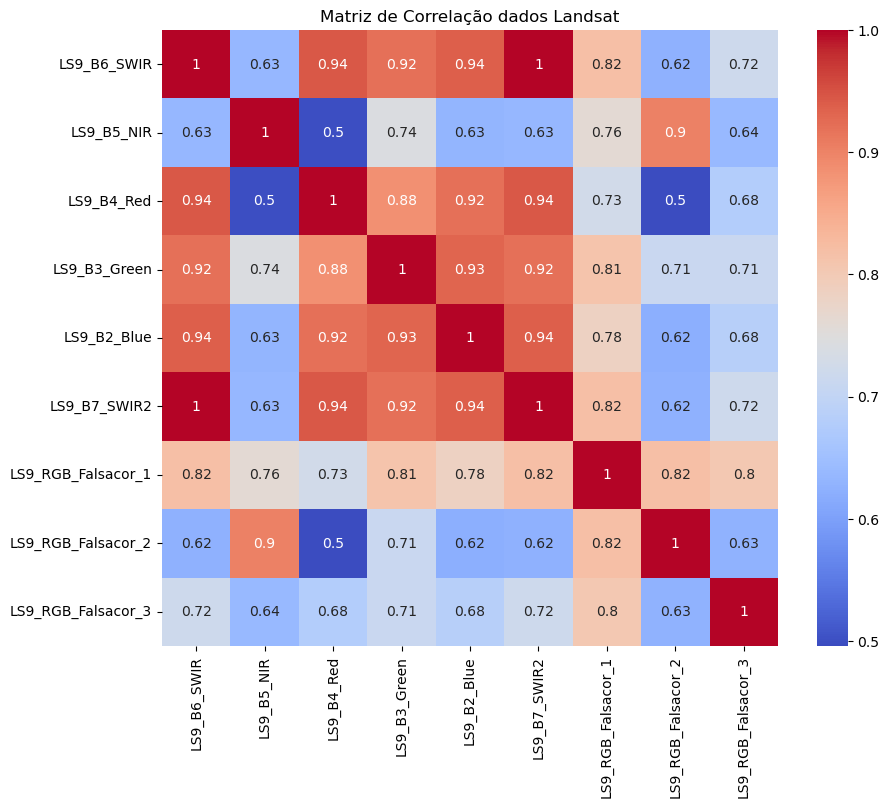

In [41]:
# Calcula a matriz de correlação
corr_matrix = df.drop(['fid', 'lon', 'lat', 'SIGLA_UNID', 'COD_UNI_ES','TC',
 'Kperc',
 'eU',
 'eTh',
 'U_Th',
 'U_K',
 'Th_K',
 'MDT' ], axis=1).corr()

# Plota a matriz de correlação como um heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlação dados Landsat')
plt.show()

### Criando o modelo a partir do Random Forest

In [42]:
# Definindo X e y (todas as amostras)
X = df.drop(['SIGLA_UNID', 'COD_UNI_ES'], axis=1)  # Exclui target + IDs
y = df['SIGLA_UNID']  # Ou 'COD_UNI_ES', conforme seu target

# Verificação global
print("Variáveis preditoras (X):", X.columns.tolist())
print("Variável target (y):", y.name)
print("\nShape de X (todas amostras):", X.shape)
print("Shape de y (todas amostras):", y.shape)
print("\nDistribuição original das classes:\n", y.value_counts())

Variáveis preditoras (X): ['fid', 'lon', 'lat', 'TC', 'Kperc', 'eU', 'eTh', 'U_Th', 'U_K', 'Th_K', 'MDT', 'LS9_B6_SWIR', 'LS9_B5_NIR', 'LS9_B4_Red', 'LS9_B3_Green', 'LS9_B2_Blue', 'LS9_B7_SWIR2', 'LS9_RGB_Falsacor_1', 'LS9_RGB_Falsacor_2', 'LS9_RGB_Falsacor_3']
Variável target (y): SIGLA_UNID

Shape de X (todas amostras): (6237, 20)
Shape de y (todas amostras): (6237,)

Distribuição original das classes:
 SIGLA_UNID
NP12vpf             1299
NP3sl                851
NP3sf                663
NP3an                658
NP3_gamma_ca         646
MP1_beta_am          639
NP3ps                508
NP3_beta_he          431
NP3C_cortado_1vz     323
NP3_alfa_avp         132
NP12vpfc              87
Name: count, dtype: int64


In [51]:
# 1. Divisão inicial estratificada (ANTES do SMOTE)
from sklearn.model_selection import train_test_split

X = df.drop(['SIGLA_UNID', 'COD_UNI_ES', 'fid', 'lon' 'lat'], axis=1)  # Ajuste suas colunas
y = df['SIGLA_UNID']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 2. Aplicar SMOTE APENAS nos dados de treino
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 3. Verificar balanceamento
print("Distribuição após SMOTE:")
print(pd.Series(y_train_res).value_counts())

# 4. Treinar o modelo com dados balanceados
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)

# 5. Avaliar no conjunto de teste ORIGINAL (não balanceado)
y_pred = rf.predict(X_test)

# 6. Feature Importance correto
importances = rf.feature_importances_
features = X.columns  # Nomes originais das colunas

df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

KeyError: "['lonlat'] not found in axis"

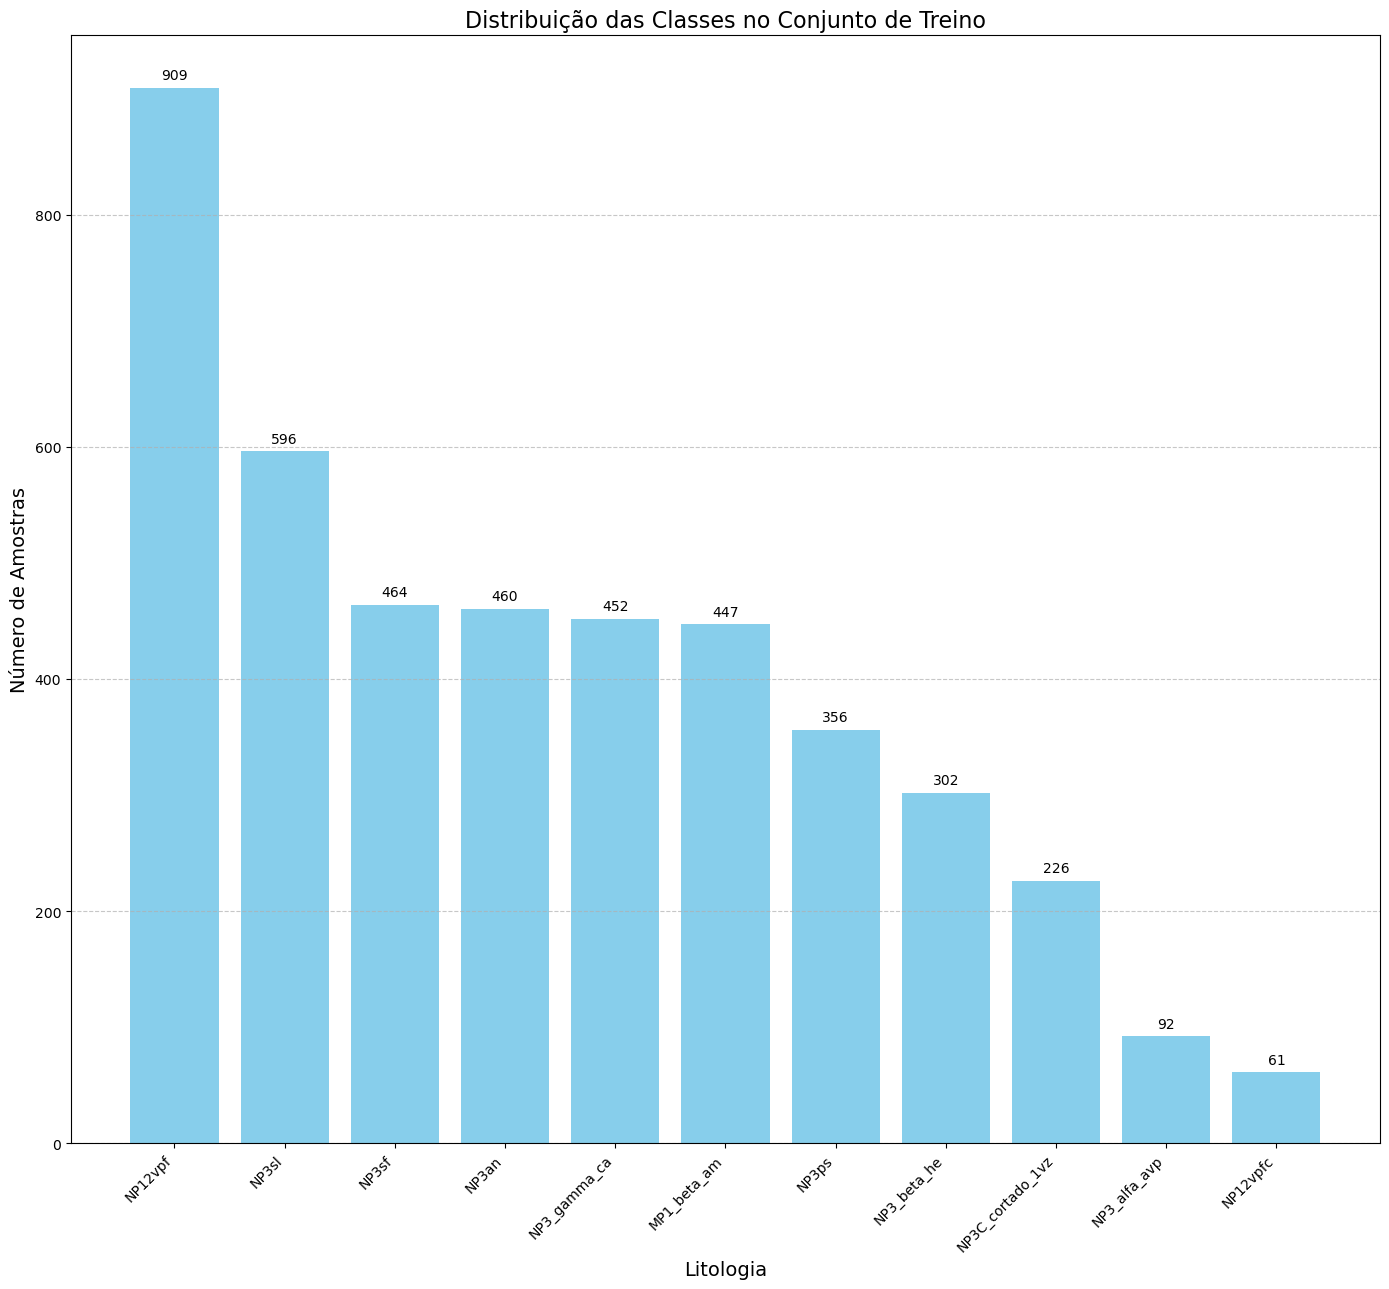

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Preparar os dados
class_dist = y_train.value_counts().reset_index()
class_dist.columns = ['Litologia', 'Quantidade']
class_dist = class_dist.sort_values('Quantidade', ascending=False)

# 2. Criar figura
plt.figure(figsize=(14, 13))

# Opção 1: Gráfico de barras simples (matplotlib)
plt.bar(class_dist['Litologia'], class_dist['Quantidade'], color='skyblue')
plt.title('Distribuição das Classes no Conjunto de Treino', fontsize=16)
plt.xlabel('Litologia', fontsize=14)
plt.ylabel('Número de Amostras', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for i, value in enumerate(class_dist['Quantidade']):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [53]:
df_treino = train_data

# Save to CSV
df_treino.to_csv('treino_Pass_Feio_data.csv', index=False)

print('CSV salvo com sucesso !!')

NameError: name 'train_data' is not defined

In [54]:

smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)


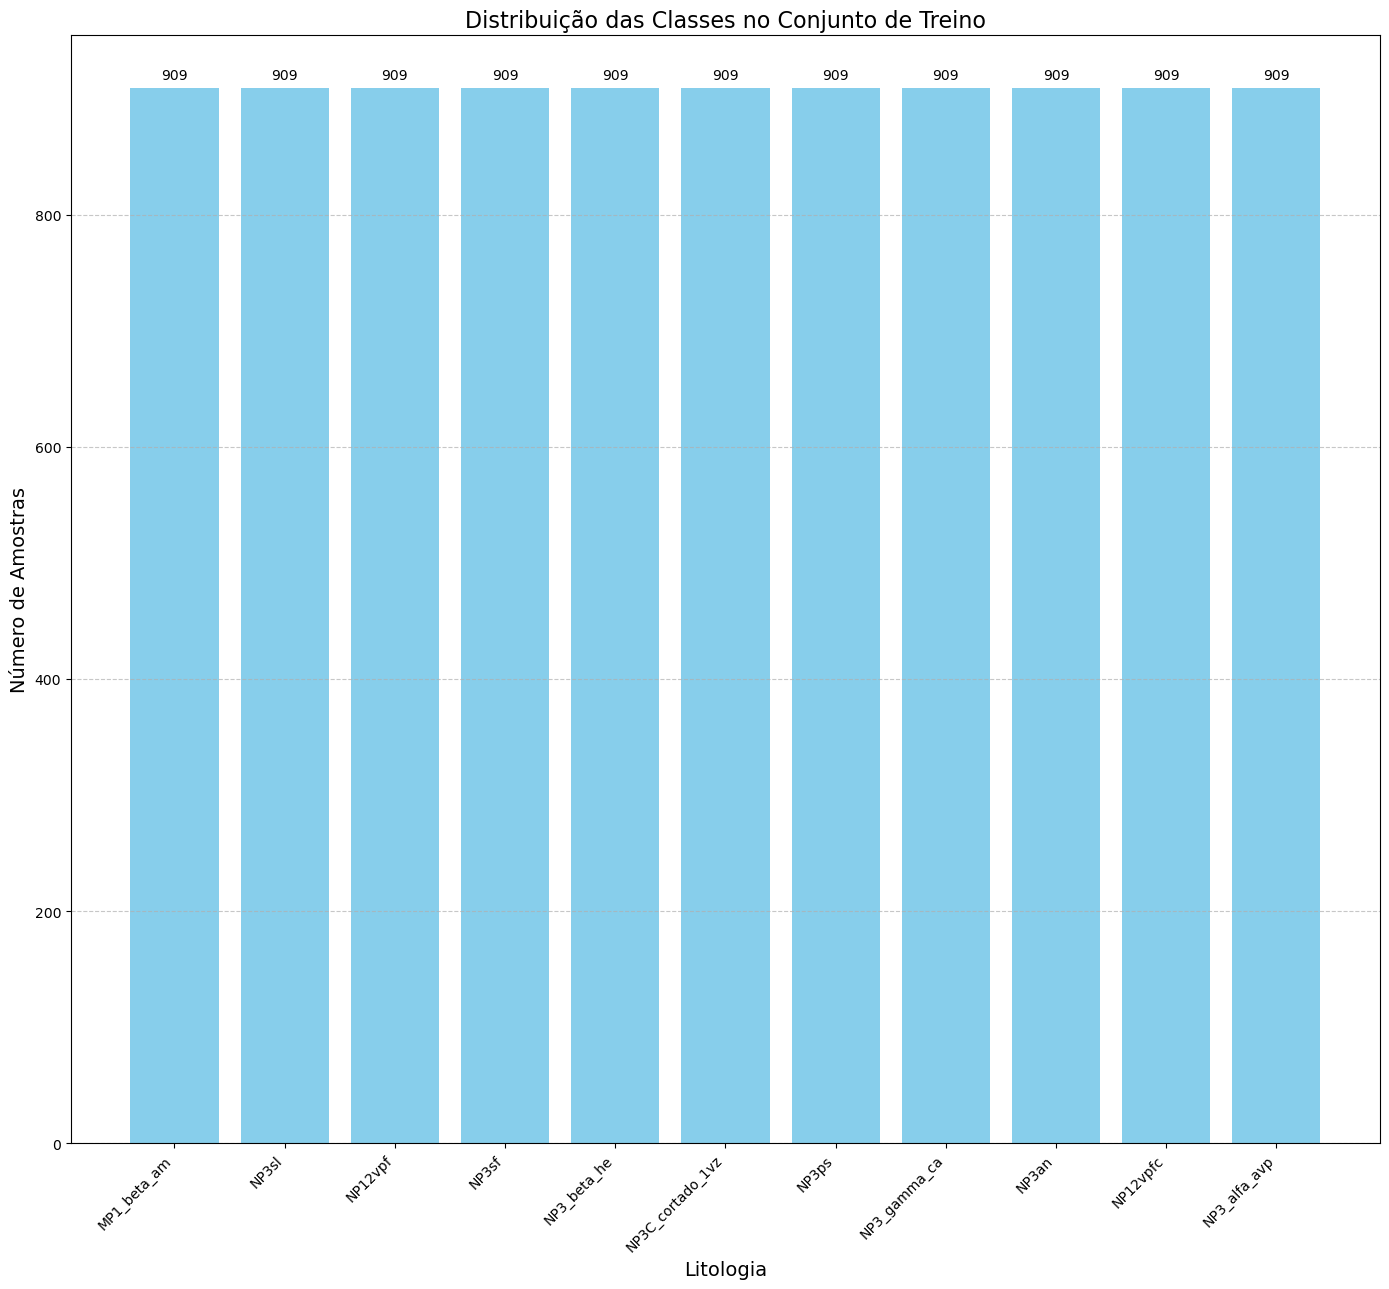

In [55]:
class_dist = y_train_smt.value_counts().reset_index()
class_dist.columns = ['Litologia', 'Quantidade']
class_dist = class_dist.sort_values('Quantidade', ascending=False)

# 2. Criar figura
plt.figure(figsize=(14, 13))

# Opção 1: Gráfico de barras simples (matplotlib)
plt.bar(class_dist['Litologia'], class_dist['Quantidade'], color='skyblue')
plt.title('Distribuição das Classes no Conjunto de Treino', fontsize=16)
plt.xlabel('Litologia', fontsize=14)
plt.ylabel('Número de Amostras', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for i, value in enumerate(class_dist['Quantidade']):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parâmetros para otimização (ajuste conforme seus dados)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Criar e treinar o modelo
rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # 'balanced' ajuda com classes desbalanceadas
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhores parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Acurácia: 0.8498931623931624

Relatório de Classificação:
                   precision    recall  f1-score   support

     MP1_beta_am       0.86      0.78      0.81       192
         NP12vpf       0.81      0.82      0.81       390
        NP12vpfc       1.00      0.92      0.96        26
NP3C_cortado_1vz       0.90      0.97      0.94        97
    NP3_alfa_avp       0.95      0.93      0.94        40
     NP3_beta_he       0.69      0.73      0.71       129
    NP3_gamma_ca       0.88      0.98      0.93       194
           NP3an       0.82      0.65      0.72       198
           NP3ps       0.78      0.82      0.79       152
           NP3sf       0.98      0.95      0.96       199
           NP3sl       0.89      0.95      0.92       255

        accuracy                           0.85      1872
       macro avg       0.87      0.86      0.86      1872
    weighted avg       0.85      0.85      0.85      1872


Matriz de Confusão:
 [[149  29   0   0   0  13   0   1   0   0   0]

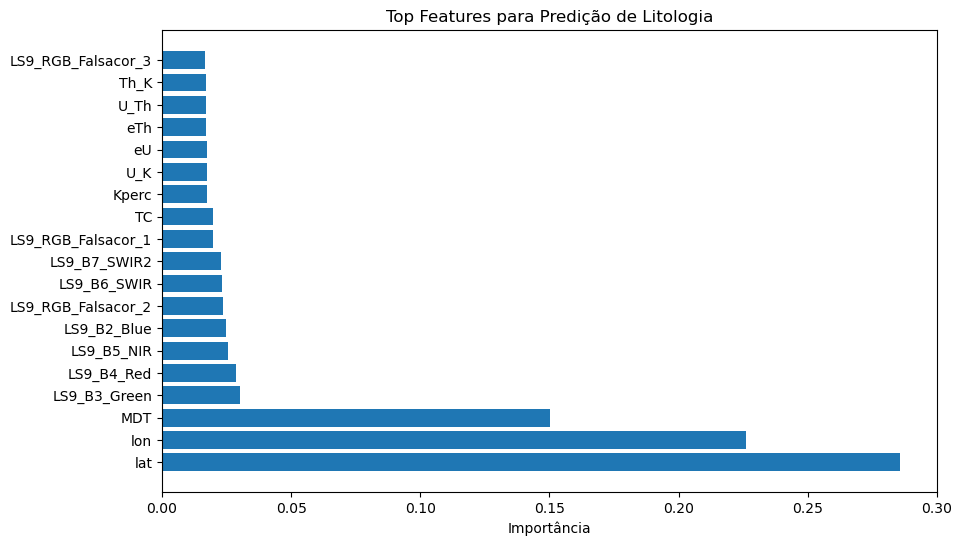

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Predições e métricas
y_pred = grid_search.best_estimator_.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

# Feature Importance (CORREÇÃO)
importances = grid_search.best_estimator_.feature_importances_
features = X_train.columns  # Usar as colunas do DataFrame de treino (não a lista 'features')

# Criar DataFrame com importância
df_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nImportância das Variáveis:")
print(df_importance)

# Plotar (opcional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'])
plt.xlabel('Importância')
plt.title('Top Features para Predição de Litologia')
plt.show()